<a href="https://colab.research.google.com/github/JorgeICS/Primeos_Analisis_Geopandas/blob/main/obtener_puntos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas pandas matplotlib

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
bccf=gpd.read_file('/content/drive/MyDrive/Carreteras_federales_porEstado/Baja California_carrFed2023.shp')

In [46]:
from shapely.geometry import MultiLineString, LineString, Point

In [47]:
def extract_points(geom):
    points = []
    if geom.geom_type == 'MultiLineString':
        for line in geom.geoms:  # Usar geom.geoms para iterar sobre las líneas
            points.extend([Point(coord) for coord in line.coords])
    elif geom.geom_type == 'LineString':
        points = [Point(coord) for coord in geom.coords]
    return points

In [48]:
bccf['points'] = bccf['geometry'].apply(lambda geom: extract_points(geom))

In [87]:
sin_ID=bccf.loc[bccf['NOMBRE'].str.len()==3]

In [88]:
cf_con_ID=bccf.loc[bccf['NOMBRE'].str.len()>3]

In [89]:
columnas_originales=bccf.columns
nuevos_ID= pd.DataFrame(columns=columnas_originales)
nuevos_ID.shape

(0, 24)

In [5]:
# quitar todas las columnas menos NOMBRE ,CODIGO,ID_RED,geometry

cf_con_ID = cf_con_ID[['NOMBRE', 'CODIGO', 'ID_RED', 'geometry']]


In [6]:
cf_con_ID = cf_con_ID.dissolve(
     by=['NOMBRE','CODIGO'],
     aggfunc={
         'ID_RED' : 'count'
     },
 )

In [27]:
cf_con_ID

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,CIRCULA,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry
0,1176210,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,60,1892704,1366450,36.778849,6.0,2017-10-24 15:28:51,Definida,"LINESTRING (1322597.250 1820024.019, 1322607.2..."
1,1176208,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,60,1892703,1892704,139.163790,6.0,2017-10-24 13:32:34,Definida,"LINESTRING (1322611.366 1820162.106, 1322605.2..."
2,1176209,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,60,1363073,1892703,70.463877,6.0,2017-10-24 10:52:22,Definida,"LINESTRING (1322620.888 1820231.919, 1322617.6..."
3,428182,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,60,1363161,1362875,525.961935,6.0,2012-10-25 08:52:37,Definida,"LINESTRING (1322688.810 1819987.566, 1322687.6..."
5,427858,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,60,1362662,1363073,262.619599,6.0,2017-10-24 10:56:08,Definida,"LINESTRING (1322745.568 1820446.445, 1322742.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,429540,Carretera,Escénica Tijuana - Ensenada,1,Con pavimento,Asfalto,2,Habilitado,En operación,1,...,Un sentido,1,80,882642,1364176,48.054860,6.0,2023-06-08 21:21:46,Definida,"LINESTRING (1073165.156 2349296.254, 1073176.7..."
3954,2558726,Carretera,Escénica Tijuana - Ensenada,1,Con pavimento,Asfalto,2,Habilitado,En operación,1,...,Un sentido,1,80,374635,374636,46.749706,6.0,2023-06-08 21:22:14,Definida,"LINESTRING (1073181.841 2349343.715, 1073174.8..."
3955,431047,Carretera,Escénica Tijuana - Ensenada,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,80,1364176,1364713,68.900612,6.0,2023-05-31 23:23:25,Definida,"LINESTRING (1073187.900 2349338.558, 1073212.0..."
3956,677776,Carretera,Escénica Tijuana - Ensenada,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,1,80,379213,374635,354.219300,6.0,2023-07-05 13:18:24,Definida,"LINESTRING (1073485.443 2349501.639, 1073453.3..."


In [30]:
cf_con_ID['points'] = cf_con_ID['geometry'].apply(lambda geom: extract_points(geom))

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [31]:
cf_con_ID

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,points
0,1176210,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,60,1892704,1366450,36.778849,6.0,2017-10-24 15:28:51,Definida,"LINESTRING (1322597.250 1820024.019, 1322607.2...",[POINT (1322597.2501115561 1820024.0186989845)...
1,1176208,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,60,1892703,1892704,139.163790,6.0,2017-10-24 13:32:34,Definida,"LINESTRING (1322611.366 1820162.106, 1322605.2...",[POINT (1322611.3655368001 1820162.1056837225)...
2,1176209,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,60,1363073,1892703,70.463877,6.0,2017-10-24 10:52:22,Definida,"LINESTRING (1322620.888 1820231.919, 1322617.6...",[POINT (1322620.8883462609 1820231.9194758113)...
3,428182,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,60,1363161,1362875,525.961935,6.0,2012-10-25 08:52:37,Definida,"LINESTRING (1322688.810 1819987.566, 1322687.6...",[POINT (1322688.8095223103 1819987.5660965191)...
5,427858,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,60,1362662,1363073,262.619599,6.0,2017-10-24 10:56:08,Definida,"LINESTRING (1322745.568 1820446.445, 1322742.0...",[POINT (1322745.5684726282 1820446.4445461442)...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,429540,Carretera,Escénica Tijuana - Ensenada,1,Con pavimento,Asfalto,2,Habilitado,En operación,1,...,1,80,882642,1364176,48.054860,6.0,2023-06-08 21:21:46,Definida,"LINESTRING (1073165.156 2349296.254, 1073176.7...",[POINT (1073165.1560620188 2349296.2539082333)...
3954,2558726,Carretera,Escénica Tijuana - Ensenada,1,Con pavimento,Asfalto,2,Habilitado,En operación,1,...,1,80,374635,374636,46.749706,6.0,2023-06-08 21:22:14,Definida,"LINESTRING (1073181.841 2349343.715, 1073174.8...","[POINT (1073181.8409064284 2349343.715045236),..."
3955,431047,Carretera,Escénica Tijuana - Ensenada,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,80,1364176,1364713,68.900612,6.0,2023-05-31 23:23:25,Definida,"LINESTRING (1073187.900 2349338.558, 1073212.0...","[POINT (1073187.8999081566 2349338.557786868),..."
3956,677776,Carretera,Escénica Tijuana - Ensenada,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,80,379213,374635,354.219300,6.0,2023-07-05 13:18:24,Definida,"LINESTRING (1073485.443 2349501.639, 1073453.3...","[POINT (1073485.4431078907 2349501.638656278),..."


In [32]:
sin_ID['points'] = sin_ID['geometry'].apply(lambda geom: extract_points(geom))

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [33]:
sin_ID

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,points
4,1176212,Carretera,N/D,N/D,Con pavimento,Concreto,2,Habilitado,En operación,0,...,1,40,1363073,1892705,35.936246,7.0,2017-10-24 16:08:34,Definida,"LINESTRING (1322620.888 1820231.919, 1322600.6...",[POINT (1322620.8883462609 1820231.9194758113)...
882,428160,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,60,1363080,1362998,177.798696,6.0,2012-12-03 11:10:47,Definida,"LINESTRING (1202946.447 2164585.362, 1202967.9...",[POINT (1202946.4471782038 2164585.3616898325)...
1911,2389932,Carretera,N/D,2,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,40,207143,207144,4.748316,6.0,2020-01-29 14:15:11,Definida,"LINESTRING (1286086.893 2325056.798, 1286088.9...","[POINT (1286086.893411562 2325056.7982624695),..."
1912,423910,Carretera,N/D,2,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,40,207144,207145,4.800367,6.0,2020-01-29 09:45:41,Definida,"LINESTRING (1286088.919 2325061.093, 1286090.9...","[POINT (1286088.9187007472 2325061.092992882),..."
1913,2389933,Carretera,N/D,2,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,40,207145,207146,2.230006,6.0,2020-01-29 10:09:26,Definida,"LINESTRING (1286090.966 2325065.435, 1286091.9...","[POINT (1286090.9660842984 2325065.434852066),..."
3788,1065130,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,60,634485,1364679,226.746590,6.0,2017-05-08 11:33:50,Definida,"LINESTRING (1118069.792 2345760.764, 1118081.8...","[POINT (1118069.7921155305 2345760.763531851),..."
3789,1065127,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,60,634484,634485,227.385845,6.0,2019-12-10 12:47:06,Definida,"LINESTRING (1118266.749 2345873.621, 1118263.6...","[POINT (1118266.7488281038 2345873.621270108),..."
3793,429914,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,60,1364401,634485,606.489422,6.0,2016-07-11 13:30:56,Definida,"LINESTRING (1117599.350 2346110.574, 1117627.3...",[POINT (1117599.3498614396 2346110.5740128793)...
3794,430479,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,60,634485,1364453,608.666977,6.0,2016-07-11 16:20:10,Definida,"LINESTRING (1118069.792 2345760.764, 1118062.8...","[POINT (1118069.7921155305 2345760.763531851),..."
3796,430838,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,60,1364679,1363875,468.830611,6.0,2021-06-08 14:36:09,Definida,"LINESTRING (1118269.382 2345867.630, 1118274.7...",[POINT (1118269.3821030993 2345867.6298835254)...


In [14]:
  columna1='points'
  for idx, row in sin_ID.iterrows():
    if (row[columna1] in cf_con_ID[columna1].values):
      nombre_nuevo = cf_con_ID.loc[cf_con_ID[columna1] == row[columna1], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo

ValueError: operands could not be broadcast together with shapes (35,) (3,) 

In [15]:
# Comparar cada punto individualmente
for idx, row in sin_ID.iterrows():
    for point in row[columna1]:  # Iterar sobre cada punto en la lista de puntos
        match_found = False
        for i, points_list in cf_con_ID[columna1].items():
            if any(point.equals(p) for p in points_list):  # Comparar cada punto
                nombre_nuevo = i  # Usar 'i' directamente como 'NOMBRE'
                sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
                match_found = True
                break
        if match_found:
            break

In [20]:
# PARA DOS INDICES
columna1='points'

for idx, row in sin_ID.iterrows():
    for point in row[columna1]:  # Iterar sobre cada punto en la lista de puntos
        match_found = False
        for i, points_list in cf_con_ID[columna1].items():
            if any(point.equals(p) for p in points_list):  # Comparar cada punto
                nombre_nuevo = i[0]  # Primer índice
                codigo_nuevo = i[1]  # Segundo índice
                sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
                sin_ID.at[idx, 'CODIGO'] = codigo_nuevo
                match_found = True


                # Agregar la fila a cf_con_ID si se cambió el NOMBRE
                nueva_fila = pd.DataFrame({
                    'geometry': [row['geometry']],
                    'points': [row['points']]
                }, index=pd.MultiIndex.from_tuples([(nombre_nuevo, codigo_nuevo)], names=['NOMBRE', 'CODIGO']))

                cf_con_ID = pd.concat([cf_con_ID, nueva_fila])

                # Eliminar la fila de sin_ID inmediatamente
                sin_ID.drop(idx, inplace=True)
                break
        if match_found:
            break

<ipython-input-20-ee12746a047b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_ID.drop(idx, inplace=True)
<ipython-input-20-ee12746a047b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_ID.drop(idx, inplace=True)
<ipython-input-20-ee12746a047b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_ID.drop(idx, inplace=True)
<ipython-input-20-ee12746a047b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [60]:
# PARA DOS INDICES
columna1='points'

for idx, row in sin_ID.iterrows():
    for point in row[columna1]:  # Iterar sobre cada punto en la lista de puntos
        match_found = False
        for i, points_list in cf_con_ID[columna1].items():
            if any(point.equals(p) for p in points_list): # Comparar cada punto
              nombre_nuevo = cf_con_ID.loc[i, 'NOMBRE'].values[0] # Primer índice
              codigo_nuevo = cf_con_ID.loc[i, 'CODIGO'].values[0]  # Segundo índice
              sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
              sin_ID.at[idx, 'CODIGO'] = codigo_nuevo
              match_found = True


              # Agregar la fila a cf_con_ID si se cambió el NOMBRE
              nueva_fila = pd.DataFrame({
                    'geometry': [row['geometry']],
                    'points': [row['points']]
                }, index=pd.MultiIndex.from_tuples([(nombre_nuevo, codigo_nuevo)], names=['NOMBRE', 'CODIGO']))

              cf_con_ID = pd.concat([cf_con_ID, nueva_fila])
              nuevos_ID = pd.concat([nuevos_ID, nueva_fila])
                # Eliminar la fila de sin_ID inmediatamente
              sin_ID.drop(idx, inplace=True)
              break
        if match_found:
            break

AttributeError: 'str' object has no attribute 'values'

In [61]:
columna1 = 'points'

for idx, row in sin_ID.iterrows():
    for point in row[columna1]:  # Iterar sobre cada punto en la lista de puntos
        match_found = False
        for i, points_list in cf_con_ID[columna1].items():
            if any(point.equals(p) for p in points_list):  # Comparar cada punto
                # Acceder al valor de la columna 'NOMBRE' y 'CODIGO'
                nombre_nuevo = cf_con_ID.loc[i, 'NOMBRE']  # Aquí 'i' es la tupla de índices
                codigo_nuevo = cf_con_ID.loc[i, 'CODIGO']  # Aquí 'i' es la tupla de índices

                sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
                sin_ID.at[idx, 'CODIGO'] = codigo_nuevo
                match_found = True

                # Agregar la fila a cf_con_ID si se cambió el NOMBRE
                nueva_fila = pd.DataFrame({
                    'geometry': [row['geometry']],
                    'points': [row['points']]
                }, index=pd.MultiIndex.from_tuples([(nombre_nuevo, codigo_nuevo)], names=['NOMBRE', 'CODIGO']))

                cf_con_ID = pd.concat([cf_con_ID, nueva_fila])
                nuevos_ID = pd.concat([nuevos_ID, nueva_fila])

                # Eliminar la fila de sin_ID inmediatamente
                sin_ID.drop(idx, inplace=True)
                break
        if match_found:
            break


<ipython-input-61-f58895e54434>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_ID.drop(idx, inplace=True)
<ipython-input-61-f58895e54434>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_ID.drop(idx, inplace=True)
<ipython-input-61-f58895e54434>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_ID.drop(idx, inplace=True)
<ipython-input-61-f58895e54434>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy o

AssertionError: 

In [78]:
columna1 = 'points'
filas_a_eliminar = []  # Lista para almacenar los índices de las filas a eliminar

for idx, row in sin_ID.iterrows():
    for point in row[columna1]:  # Iterar sobre cada punto en la lista de puntos
        match_found = False
        for i, points_list in cf_con_ID[columna1].items():
            if any(point.equals(p) for p in points_list):  # Comparar cada punto
                # Acceder al valor de la columna 'NOMBRE' y 'CODIGO'
                nombre_nuevo = cf_con_ID.loc[i, 'NOMBRE']
                codigo_nuevo = cf_con_ID.loc[i, 'CODIGO']

                # Actualizar sin_ID con los valores nuevos
                sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
                sin_ID.at[idx, 'CODIGO'] = codigo_nuevo
                match_found = True

                # Copiar toda la fila de sin_ID
                nueva_fila = row.copy()
                # Modificar solo las columnas necesarias
                nueva_fila['NOMBRE'] = nombre_nuevo
                nueva_fila['CODIGO'] = codigo_nuevo

                # Agregar la fila actualizada a cf_con_ID
                cf_con_ID = pd.concat([cf_con_ID, nueva_fila.to_frame().T])
                nuevos_ID = pd.concat([nuevos_ID, nueva_fila.to_frame().T])

                # Acumular el índice de la fila para eliminarla después
                filas_a_eliminar.append(idx)
                break
        if match_found:
            break

# Eliminar las filas acumuladas después del bucle
sin_ID.drop(filas_a_eliminar, inplace=True)



<ipython-input-78-b5eaa76a8505>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_ID.drop(filas_a_eliminar, inplace=True)


In [91]:
sin_ID

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,points


In [92]:
nuevos_ID

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,points
4,1176212,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Concreto,2,Habilitado,En operación,0,...,1,40,1363073,1892705,35.936246,7.0,2017-10-24 16:08:34,Definida,LINESTRING (1322620.8883462609 1820231.9194758...,[POINT (1322620.8883462609 1820231.9194758113)...
882,428160,Carretera,Ramal a Observatorio San Pedro Mártir,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,60,1363080,1362998,177.798696,6.0,2012-12-03 11:10:47,Definida,LINESTRING (1202946.4471782038 2164585.3616898...,[POINT (1202946.4471782038 2164585.3616898325)...
1911,2389932,Carretera,Sonoita - Mexicali,2,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,40,207143,207144,4.748316,6.0,2020-01-29 14:15:11,Definida,LINESTRING (1286086.893411562 2325056.79826246...,"[POINT (1286086.893411562 2325056.7982624695),..."
1912,423910,Carretera,Sonoita - Mexicali,2,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,40,207144,207145,4.800367,6.0,2020-01-29 09:45:41,Definida,LINESTRING (1286088.9187007472 2325061.0929928...,"[POINT (1286088.9187007472 2325061.092992882),..."
1913,2389933,Carretera,Sonoita - Mexicali,2,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,40,207145,207146,2.230006,6.0,2020-01-29 10:09:26,Definida,LINESTRING (1286090.9660842984 2325065.4348520...,"[POINT (1286090.9660842984 2325065.434852066),..."
3788,1065130,Carretera,Quinta,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,60,634485,1364679,226.74659,6.0,2017-05-08 11:33:50,Definida,LINESTRING (1118069.7921155305 2345760.7635318...,"[POINT (1118069.7921155305 2345760.763531851),..."
3789,1065127,Carretera,Quinta,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,60,634484,634485,227.385845,6.0,2019-12-10 12:47:06,Definida,LINESTRING (1118266.7488281038 2345873.6212701...,"[POINT (1118266.7488281038 2345873.621270108),..."
3793,429914,Carretera,Quinta,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,60,1364401,634485,606.489422,6.0,2016-07-11 13:30:56,Definida,LINESTRING (1117599.3498614396 2346110.5740128...,[POINT (1117599.3498614396 2346110.5740128793)...
3794,430479,Carretera,Quinta,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,60,634485,1364453,608.666977,6.0,2016-07-11 16:20:10,Definida,LINESTRING (1118069.7921155305 2345760.7635318...,"[POINT (1118069.7921155305 2345760.763531851),..."
3796,430838,Carretera,Quinta,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,60,1364679,1363875,468.830611,6.0,2021-06-08 14:36:09,Definida,LINESTRING (1118269.3821030993 2345867.6298835...,[POINT (1118269.3821030993 2345867.6298835254)...


In [93]:
cf_con_ID

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,points
0,1176210,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,60,1892704,1366450,36.778849,6.0,2017-10-24 15:28:51,Definida,"LINESTRING (1322597.250 1820024.019, 1322607.2...",[POINT (1322597.2501115561 1820024.0186989845)...
1,1176208,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,60,1892703,1892704,139.16379,6.0,2017-10-24 13:32:34,Definida,"LINESTRING (1322611.366 1820162.106, 1322605.2...",[POINT (1322611.3655368001 1820162.1056837225)...
2,1176209,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,60,1363073,1892703,70.463877,6.0,2017-10-24 10:52:22,Definida,"LINESTRING (1322620.888 1820231.919, 1322617.6...",[POINT (1322620.8883462609 1820231.9194758113)...
3,428182,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,60,1363161,1362875,525.961935,6.0,2012-10-25 08:52:37,Definida,"LINESTRING (1322688.810 1819987.566, 1322687.6...",[POINT (1322688.8095223103 1819987.5660965191)...
5,427858,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,60,1362662,1363073,262.619599,6.0,2017-10-24 10:56:08,Definida,"LINESTRING (1322745.568 1820446.445, 1322742.0...",[POINT (1322745.5684726282 1820446.4445461442)...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,432110,Carretera,Tecate - El Sauzal,3,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,60,1364594,340784,12.709423,6.0,2021-06-08 14:51:08,Definida,"LINESTRING (1118863.635 2346139.099, 1118875.0...",[POINT (1118863.6352640148 2346139.0990741835)...
3803,2561203,Carretera,Quinta,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,60,340785,340787,11.814519,6.0,2021-06-08 16:02:23,Definida,"LINESTRING (1118880.581 2346146.652, 1118869.8...","[POINT (1118880.5807261313 2346146.651760752),..."
3826,430121,Carretera,Quinta,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,60,341713,1364401,525.090058,6.0,2021-06-09 09:56:45,Definida,"LINESTRING (1117095.144 2346072.910, 1117100.8...",[POINT (1117095.1438504115 2346072.9100752925)...
3827,430497,Carretera,Quinta,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,60,1364453,1751530,290.081263,6.0,2016-09-20 13:00:15,Definida,"LINESTRING (1117604.017 2346116.785, 1117583.9...","[POINT (1117604.0169206362 2346116.784828458),..."


In [90]:
columna1 = 'points'
sin_ID_indices = sin_ID.index.tolist()  # Obtener la lista de índices para evitar problemas durante la iteración

while sin_ID.shape[0] > 0:  # Continuar mientras haya filas en sin_ID
    for idx in sin_ID_indices:
        if idx not in sin_ID.index:
            continue  # Saltar si la fila ya fue eliminada

        row = sin_ID.loc[idx]
        match_found = False

        for i, points_list in cf_con_ID[columna1].items():
            for point in row[columna1]:  # Iterar sobre cada punto en la lista de puntos
                if any(point.equals(p) for p in points_list):  # Comparar cada punto
                    # Obtener los valores de 'NOMBRE' y 'CODIGO' de cf_con_ID
                    nombre_nuevo = cf_con_ID.loc[i, 'NOMBRE']
                    codigo_nuevo = cf_con_ID.loc[i, 'CODIGO']

                    # Actualizar sin_ID con los valores nuevos
                    sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
                    sin_ID.at[idx, 'CODIGO'] = codigo_nuevo

                    # Copiar toda la fila de sin_ID
                    nueva_fila = row.copy()
                    # Modificar solo las columnas necesarias
                    nueva_fila['NOMBRE'] = nombre_nuevo
                    nueva_fila['CODIGO'] = codigo_nuevo

                    # Agregar la fila actualizada a cf_con_ID
                    cf_con_ID = pd.concat([cf_con_ID, nueva_fila.to_frame().T])
                    nuevos_ID = pd.concat([nuevos_ID, nueva_fila.to_frame().T])

                    # Eliminar la fila de sin_ID inmediatamente
                    sin_ID.drop(idx, inplace=True)
                    match_found = True
                    break  # Salir del bucle si se encontró una coincidencia
            if match_found:
                break

        # Recalcular los índices para asegurarse de que el ciclo while esté actualizado
        sin_ID_indices = sin_ID.index.tolist()


<ipython-input-90-6d2f6024be93>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_ID.drop(idx, inplace=True)
<ipython-input-90-6d2f6024be93>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_ID.drop(idx, inplace=True)
<ipython-input-90-6d2f6024be93>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_ID.drop(idx, inplace=True)
<ipython-input-90-6d2f6024be93>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [94]:
# quitar todas las columnas menos NOMBRE ,CODIGO,ID_RED,geometry

cf_con_ID = cf_con_ID[['NOMBRE', 'CODIGO', 'ID_RED', 'geometry']]


In [95]:
cf_con_ID = cf_con_ID.dissolve(
     by=['NOMBRE','CODIGO'],
     aggfunc={
         'ID_RED' : 'count'
     },
 )

In [96]:
cf_con_ID

,,geometry,ID_RED
NOMBRE,CODIGO,,
Autopista Tijuana - Ensenada,1,"MULTILINESTRING ((1107753.948 2270854.396, 110...",33
Camino a Molino Viejo,N/D,"MULTILINESTRING ((1158900.946 2111822.768, 115...",16
El Sauzal - Guadalupe,3,"MULTILINESTRING ((1104253.528 2275455.709, 110...",150
Ensenada - El Chinero,3,"MULTILINESTRING ((1192562.447 2210216.929, 119...",9
Ensenada - Ent. Ojos Negros,3,"MULTILINESTRING ((1115122.698 2270386.153, 111...",76
Ensenada - Lázaro Cárdenas,1,"MULTILINESTRING ((1162025.413 2117264.520, 116...",464
Escénica Tijuana - Ensenada,1,"MULTILINESTRING ((1077683.974 2320707.473, 107...",67
Héroes de la Independencia - San Matías,3,"MULTILINESTRING ((1208333.817 2201139.711, 120...",49
Libramiento Mexicali,2,"MULTILINESTRING ((1235115.795 2333179.712, 123...",39


<Axes: >

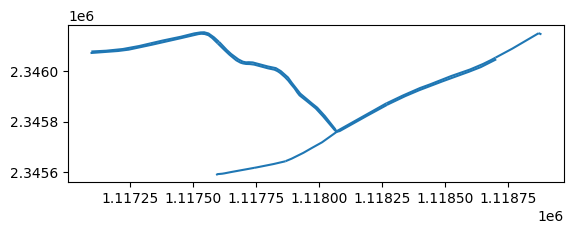

In [97]:
cf_con_ID.loc['Quinta'].plot()

In [39]:
sin_ID.loc[sin_ID['NOMBRE']!='N/D']

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,points


In [22]:
cf_con_ID

,,geometry,ID_RED,points
NOMBRE,CODIGO,,,
Autopista Tijuana - Ensenada,1,"MULTILINESTRING ((1107753.948 2270854.396, 110...",33.0,[POINT (1107753.9479031267 2270854.3957965104)...
Camino a Molino Viejo,N/D,"MULTILINESTRING ((1158900.946 2111822.768, 115...",16.0,"[POINT (1158900.9460106208 2111822.767989063),..."
El Sauzal - Guadalupe,3,"MULTILINESTRING ((1104253.528 2275455.709, 110...",150.0,[POINT (1104253.5283810603 2275455.7085265173)...
Ensenada - El Chinero,3,"MULTILINESTRING ((1192562.447 2210216.929, 119...",9.0,"[POINT (1192562.447186398 2210216.9293690035),..."
Ensenada - Ent. Ojos Negros,3,"MULTILINESTRING ((1115122.698 2270386.153, 111...",76.0,"[POINT (1115122.698346028 2270386.152723046), ..."
Ensenada - Lázaro Cárdenas,1,"MULTILINESTRING ((1162025.413 2117264.520, 116...",464.0,"[POINT (1162025.412562298 2117264.519965968), ..."
Escénica Tijuana - Ensenada,1,"MULTILINESTRING ((1077683.974 2320707.473, 107...",67.0,"[POINT (1077683.974315717 2320707.4731537574),..."
Héroes de la Independencia - San Matías,3,"MULTILINESTRING ((1208333.817 2201139.711, 120...",49.0,[POINT (1208333.8170791387 2201139.7109771213)...
Libramiento Mexicali,2,"MULTILINESTRING ((1235115.795 2333179.712, 123...",39.0,"[POINT (1235115.795498298 2333179.7115176823),..."


<Axes: >

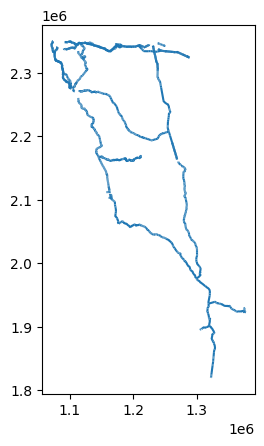

In [ ]:
bccf.plot()

In [ ]:
def extract_points(geom):
    if geom.geom_type == 'MultiLineString':
        points = []
        for line in geom:
            points.extend(list(line.coords))
        return points
    elif geom.geom_type == 'LineString':
        return list(geom.coords)
    else:
        return []



In [ ]:
bccf=bccf.loc[bccf['NOMBRE']=='Punta Prieta - Guerrero Negro']

In [ ]:
bccf['points'] = bccf['geometry'].apply(extract_points)

In [ ]:
bccf

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,points
0,1176210,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,60,1892704,1366450,36.778849,6.0,2017-10-24 15:28:51,Definida,"LINESTRING (1322597.250 1820024.019, 1322607.2...","[(1322597.2501115561, 1820024.0186989845), (13..."
1,1176208,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,60,1892703,1892704,139.163790,6.0,2017-10-24 13:32:34,Definida,"LINESTRING (1322611.366 1820162.106, 1322605.2...","[(1322611.3655368001, 1820162.1056837225), (13..."
2,1176209,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,60,1363073,1892703,70.463877,6.0,2017-10-24 10:52:22,Definida,"LINESTRING (1322620.888 1820231.919, 1322617.6...","[(1322620.8883462609, 1820231.9194758113), (13..."
3,428182,Carretera,Punta Prieta - Guerrero Negro,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,60,1363161,1362875,525.961935,6.0,2012-10-25 08:52:37,Definida,"LINESTRING (1322688.810 1819987.566, 1322687.6...","[(1322688.8095223103, 1819987.5660965191), (13..."
4,1176212,Carretera,N/D,N/D,Con pavimento,Concreto,2,Habilitado,En operación,0,...,1,40,1363073,1892705,35.936246,7.0,2017-10-24 16:08:34,Definida,"LINESTRING (1322620.888 1820231.919, 1322600.6...","[(1322620.8883462609, 1820231.9194758113), (13..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,429540,Carretera,Escénica Tijuana - Ensenada,1,Con pavimento,Asfalto,2,Habilitado,En operación,1,...,1,80,882642,1364176,48.054860,6.0,2023-06-08 21:21:46,Definida,"LINESTRING (1073165.156 2349296.254, 1073176.7...","[(1073165.1560620188, 2349296.2539082333), (10..."
3954,2558726,Carretera,Escénica Tijuana - Ensenada,1,Con pavimento,Asfalto,2,Habilitado,En operación,1,...,1,80,374635,374636,46.749706,6.0,2023-06-08 21:22:14,Definida,"LINESTRING (1073181.841 2349343.715, 1073174.8...","[(1073181.8409064284, 2349343.715045236), (107..."
3955,431047,Carretera,Escénica Tijuana - Ensenada,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,80,1364176,1364713,68.900612,6.0,2023-05-31 23:23:25,Definida,"LINESTRING (1073187.900 2349338.558, 1073212.0...","[(1073187.8999081566, 2349338.557786868), (107..."
3956,677776,Carretera,Escénica Tijuana - Ensenada,1,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1,80,379213,374635,354.219300,6.0,2023-07-05 13:18:24,Definida,"LINESTRING (1073485.443 2349501.639, 1073453.3...","[(1073485.4431078907, 2349501.638656278), (107..."


In [ ]:
# Crear un DataFrame separado para los puntos
points = bccf['points'].explode().apply(lambda point: {'x': point[0], 'y': point[1]})
points_gdf = gpd.GeoDataFrame(points.tolist(), geometry=gpd.points_from_xy(points.apply(lambda p: p['x']), points.apply(lambda p: p['y'])))



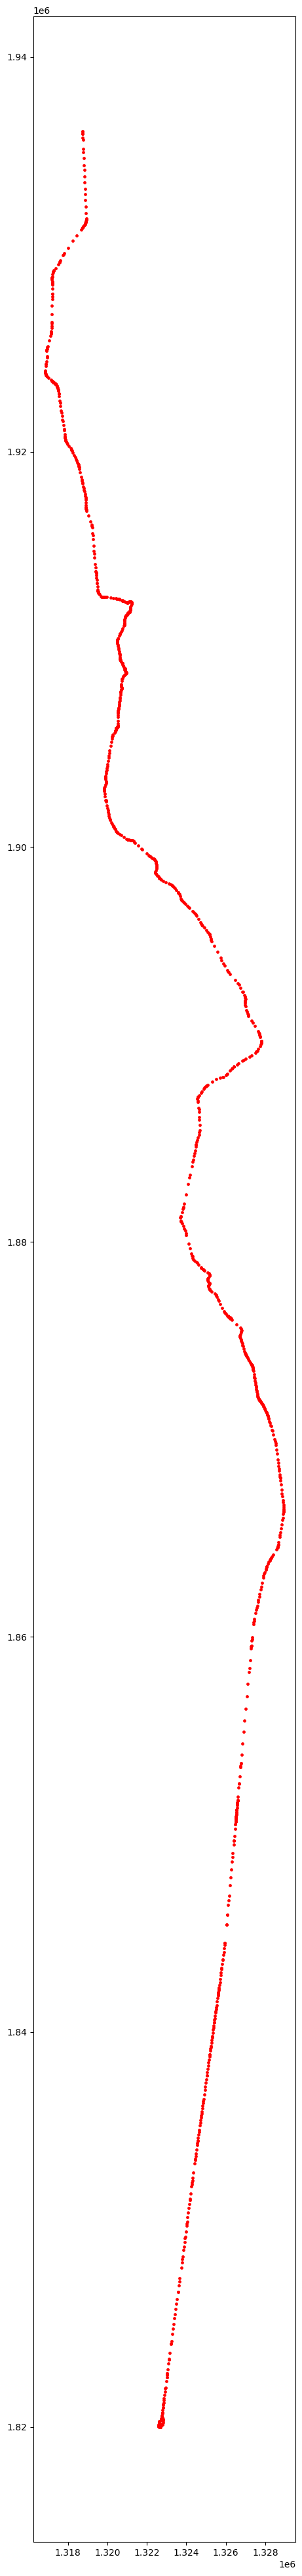

In [ ]:
# Ploteo de la geometría y los puntos
fig, ax = plt.subplots(figsize=(25, 50))
#bccf.plot(ax=ax, color='blue', linewidth=2)
points_gdf.plot(ax=ax, color='red',marker='o', markersize=6)
plt.show()

In [ ]:
points_gdf

,x,y,geometry
0,1.322597e+06,1.820024e+06,POINT (1322597.250 1820024.019)
1,1.322607e+06,1.820010e+06,POINT (1322607.211 1820010.305)
2,1.322612e+06,1.820002e+06,POINT (1322611.992 1820001.682)
3,1.322618e+06,1.819994e+06,POINT (1322617.735 1819993.533)
4,1.322611e+06,1.820162e+06,POINT (1322611.366 1820162.106)
...,...,...,...
1235,1.318779e+06,1.931404e+06,POINT (1318778.811 1931404.021)
1236,1.318743e+06,1.931356e+06,POINT (1318743.487 1931355.796)
1237,1.318742e+06,1.936232e+06,POINT (1318741.920 1936231.895)
1238,1.318744e+06,1.936207e+06,POINT (1318744.173 1936206.533)
